<h1 align='center'><b>Datamites Project 3 </b></font></h1>
<h2 align='center'><font color="Blue"><b>PRCP-1018 - Predict count of Rental Bike</b></font></h2>
<b>Project Team ID : </b>PTID-CDS-AUG-23-1608 <br>
<b>Project Start Date :</b> 22-09-2023</font></h2>

## Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Create a model which can Predict daily bike rental count based on the environmental and seasonal settings.

## Dataset Link:

[Click here for Downloading the Dataset ](https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1018-BikeRental.zip)

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

# **Domain Analysis**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

**Some valuable attributes in the dataset:**

Data Set Characteristics:  	Univariate \
Number of Instances:	17389 \
Number of Attributes:	16 (+1 (index number))

* instant: record index
*  dteday : date in format yyyy-mm-dd
* season : seasons: 
    - 1:winter
    - 2:spring
    - 3:summer 
    - 4:fall
*  yr : years 
    - 0: 2011
    - 1:2012
*  mnth : month ( 1 to 12)
*  hr : hour (0 to 23)
*  holiday : weather day is holiday or not (extracted from [Web Link])
*  weekday : day of the week
* workingday : if neither weekend nor holiday, it is 1; otherwise 0.
* weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered


### **For our Rental Bike count prediction project, we'll be doing the following:**

1. Data Loading and Splitting
Imported necessary Python libraries.
Loaded the dataset.
<br>
2. Data Preprocessing
Checked for missing values and handled them if necessary.
Explored the dataset to understand its structure.
<br>
3. Feature Engineering
Prepared the data for model training by encoding categorical features (if any).
Split the data into training and testing sets.
<br>
4. Model Building
    Implemented six different regression models:
    - Linear Regression
    - Support Vector Regressor with hyperparameter tuning using RandomizedSearchCV
    - Decision Tree Regressor
    - Random Forest Regressor with hyperparameter tuning using RandomizedSearchCV
    - XGBoost Regressor with hyperparameter tuning using RandomizedSearchCV
    - Artificial Neural Network (ANN) Regressor with hyperparameter tuning using RandomizedSearchCV
<br>
5. Model Evaluation
Calculated Mean Squared Error (MSE) and R-squared (R2) scores for each model.
Compared the performance of all models.
<br>
6. Best Model Selection
Identified the best model based on the highest R-squared score.
Reported the best model's name and its associated scores.
<br>
7. Visualization
Created two bar graphs to visualize and compare R-squared scores and Mean Squared Errors of different models side by side.
Added horizontal grid lines for better understanding.
<br>
8. Conclusion
Presented the findings and the best model for regression based on evaluation metrics.

Below is our Project code:



---



---



# Data collection - and Loading the Dataset:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">
  <p>
    <b>
    <h4 align='center'>Dataset Upload Guidelines</h4>
    </b>
  </p>

  <p>
    <ul>
      <li><span style="color: red">ⓧ</span> As per instructions in DTribe, we are only using the "hour.csv" file for our project.</li>
      <li><span style="color: red">ⓧ</span> If in colab, inorder to import and use the Dataset, please upload the file 'hour.csv' from the extracted zip file to the <b>"files Section"</b> in Colab.</li>
      <li><span style="color: red">ⓧ</span> Else please change the below data path accordingly.</li>
    </ul>
  </p>
</div>

In [3]:
# load the data
data=pd.read_csv('hour.csv')

In [4]:
data    # load successsful

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### **Basic checks**

In [5]:
data.shape

(17379, 17)

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# datatype
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


All are numerical values except "dteday" which is in the date format (as an object in python)

In [9]:
data.hr.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [10]:
# statistical analyse
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000




---



---



# **Data Preprocessing**

In [11]:
# check for missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# check for duplicates
data.duplicated().sum()

0

**Mapping the data for better understanding and model preparation**

In [13]:
data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
data['season']=data.season.map({1:'winter',2:'spring',3:'summer',4:'fall'})

In [15]:
#mnth
data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [16]:
data['mnth']=data.mnth.map({1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
#weathersit
data['weathersit'].unique()

array([1, 2, 3, 4], dtype=int64)

In [18]:
data['weathersit'].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [19]:
data['weathersit']=data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow'})

In [20]:
#weekday
data['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [21]:
#weekday
data['weekday']=data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [22]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,0,jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,0,jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,0,jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,0,jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,0,jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Removing the unwanted features**

In [23]:
# casual and registered - since cnt is the sum of casual and registered we are removing both the columns.
# instant - It is like index column so we are removing
# dteday - Since we have yr,mnth and weekday column removing the dteday.
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [24]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,winter,0,jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,16
1,winter,0,jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,40
2,winter,0,jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,32
3,winter,0,jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,13
4,winter,0,jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  int64  
 7   weathersit  17376 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.7+ MB


In [26]:
# fetching numerical columns
num_col=data.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['yr', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

In [27]:
# fetching categorical columns
cat_col=data.select_dtypes(include='O')
cat_col.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')



---



---



# **Exploratory Data Analysis**

**Univariate Analysis**

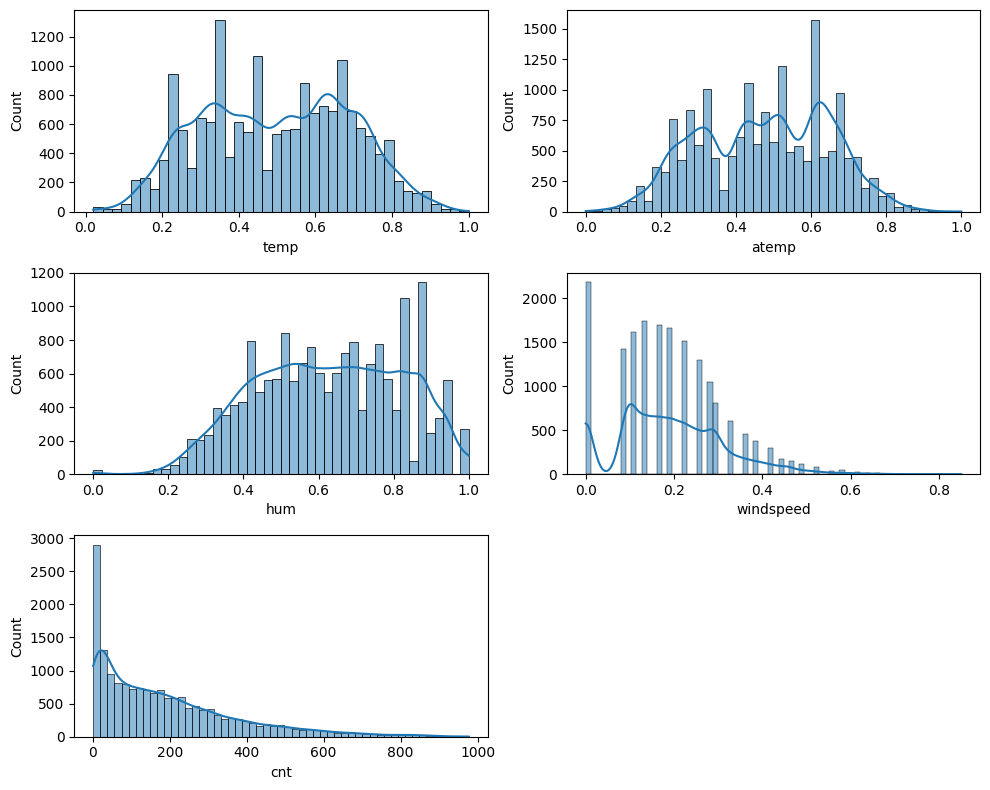

In [30]:
#Numerical columns
plt.figure(figsize=(10,8))
plotnumber=1
for i in num_col.drop(['yr','hr','holiday','workingday'],axis=1):
  if plotnumber<=6:
    ax=plt.subplot(3,2,plotnumber)
    sns.histplot(data=data,x=data[i],kde=True)
  plotnumber+= 1
plt.tight_layout()

**Insights from Univariate analysis of Numerical columns**
* Most bike rentals occur when the temperature is between 0.25 and 0.75 degrees Celsius; bike rental count decreases after 0.75 degrees Celsius.
* Bike rental count increases as humidity rises.
* As windspeed increases, bike rental count decreases.


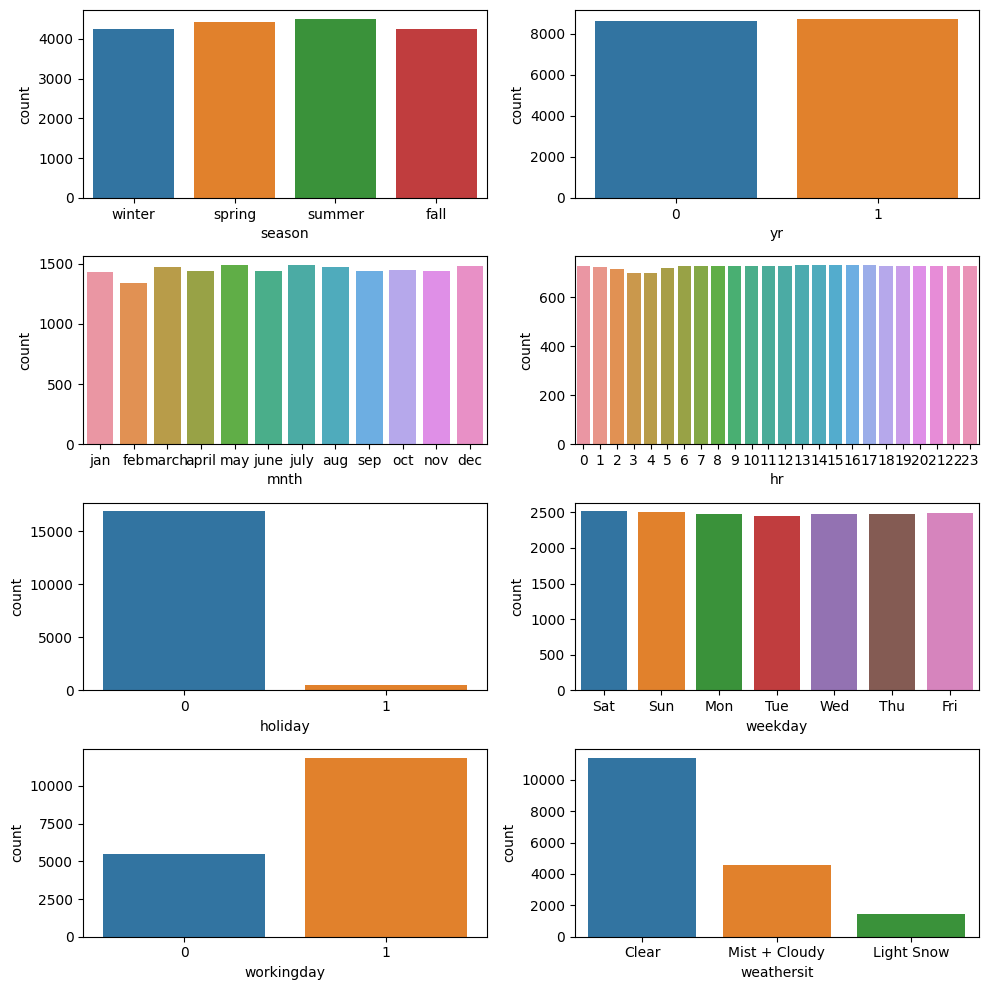

In [31]:
# Categorical columns
plt.figure(figsize=(10,10))
plotnumber=1
for i in data.drop(['temp', 'atemp', 'hum','windspeed', 'cnt'],axis=1):
  if plotnumber<=8:
    ax=plt.subplot(4,2,plotnumber)
    sns.countplot(data=data,x=data[i])
  plotnumber +=1
plt.tight_layout()


**Insights from Categorical columns**:
* On holidays, only a few records are taken.
* On working days, nearly 12,000 records were taken, while on non-working days, approximately 5,000 records were taken.
* Records taken in the spring and summer seasons were higher.
* Most records were taken when the weather was clear, followed by mist, and only a few records were taken when there was light snow.

**Bivariate Analysis**

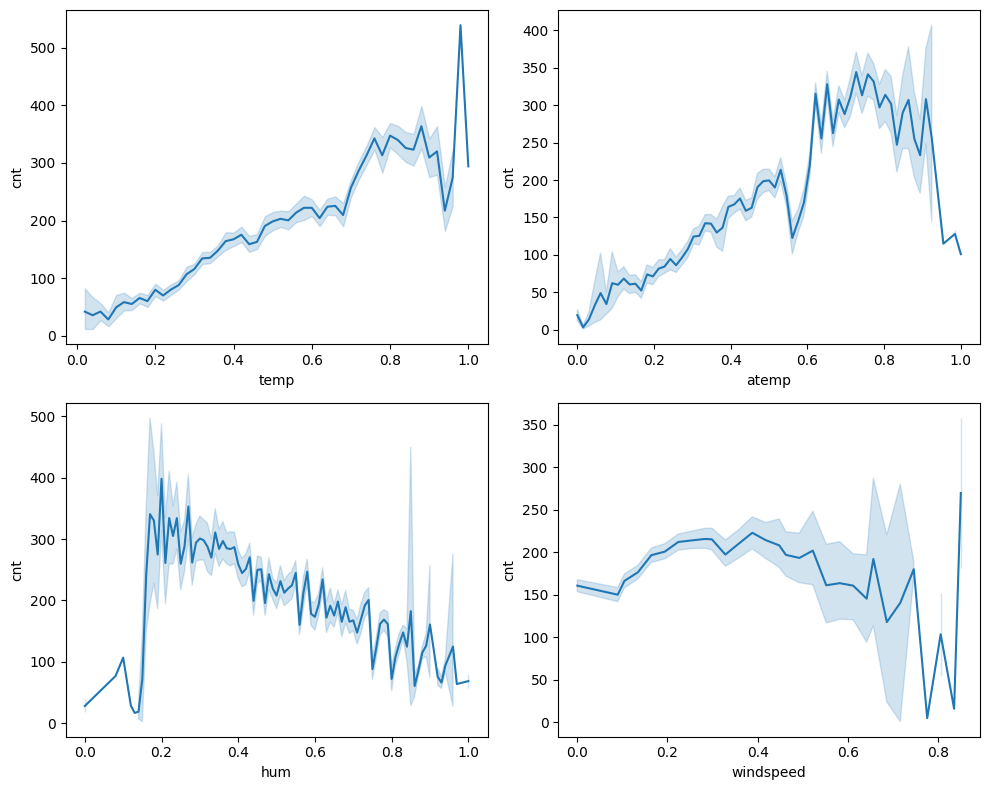

In [32]:
# Numerical Vs Cnt
plt.figure(figsize=(10,8))
plotnumber=1
for i in num_col.drop(['yr','hr','holiday','workingday','cnt'],axis=1):
  if plotnumber<=4:
    ax=plt.subplot(2,2,plotnumber)
    sns.lineplot(data=data,x=data[i],y=data['cnt'])
  plotnumber +=1
plt.tight_layout()

**Insights from Numerical columns Vs Cnt**:
* As humidity increases, the bike rental count decreases.
* The bike rental count was high until the temperature reached 1.0 degrees Celsius.

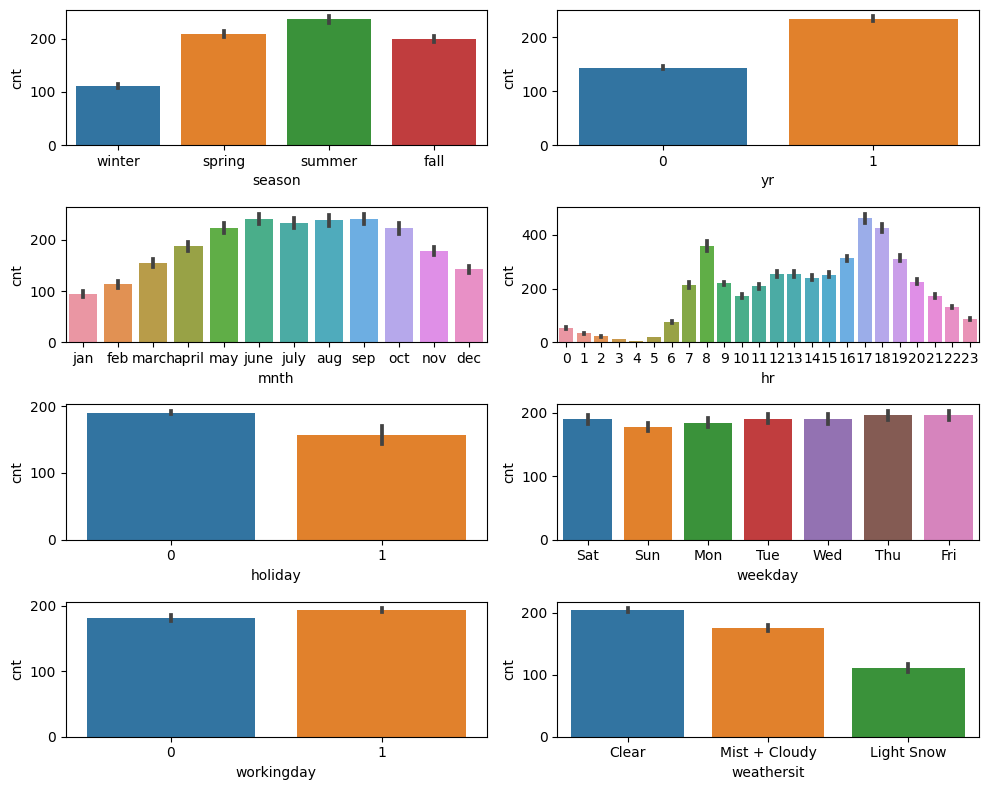

In [33]:
# Categorical column Vs cnt
plt.figure(figsize=(10,8))
plotnumber=1
for i in data.drop(['temp', 'atemp', 'hum','windspeed', 'cnt'],axis=1):
  if plotnumber<=8:
    ax=plt.subplot(4,2,plotnumber)
    sns.barplot(data=data,x=data[i],y=data['cnt'])
  plotnumber +=1
plt.tight_layout()

**Insights from Categorical columns Vs Cnt**:
* During the winter season, only a few bikes were rented. In summer, the bike rental count was high.
* From January to April, the bike rental count was lower, and in November and December, the bike rental count was also lower due to the winter season.
* On every Saturday, the bike rental count was higher.
* Most bikes were rented when the weather was clear, followed by mist and light snow.
* Bike rental counts were high from 7:00 to 19:00 hours.
* During working days, the bike rental count increased.

# 

# Data Cleaning

### **Outlier Check**

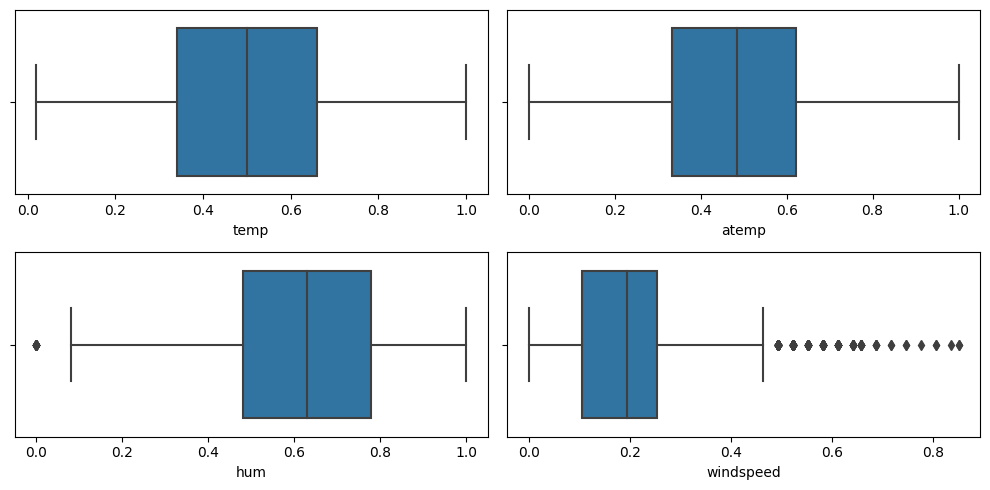

In [34]:
plt.figure(figsize=(10,5))
plotnumber=1
for i in num_col.drop(['cnt','yr','hr','holiday','workingday'],axis=1):
  if plotnumber<=4:
    ax=plt.subplot(2,2,plotnumber)
    sns.boxplot(data=data,x=data[i])
  plotnumber +=1
plt.tight_layout()

Outliers found in above check.

### **Handling Outliers**

In [35]:
# hum
Q3=data['hum'].quantile(0.75)
Q1=data['hum'].quantile(0.25)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print('lower_limit:',lower_limit)
print('upper_limit:',upper_limit)



lower_limit: 0.029999999999999916
upper_limit: 1.23


In [36]:
data.loc[(data['hum']<lower_limit) | (data['hum']>upper_limit)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
1551,winter,0,march,0,0,Thu,1,Light Snow,0.34,0.3182,0.0,0.2537,3
1552,winter,0,march,1,0,Thu,1,Light Snow,0.34,0.3182,0.0,0.2537,2
1553,winter,0,march,2,0,Thu,1,Light Snow,0.34,0.3182,0.0,0.2537,1
1554,winter,0,march,5,0,Thu,1,Light Snow,0.36,0.3485,0.0,0.1940,3
1555,winter,0,march,6,0,Thu,1,Light Snow,0.36,0.3333,0.0,0.3284,12
1556,winter,0,march,7,0,Thu,1,Light Snow,0.38,0.3939,0.0,0.2239,37
1557,winter,0,march,8,0,Thu,1,Light Snow,0.38,0.3939,0.0,0.2836,44
1558,winter,0,march,9,0,Thu,1,Light Snow,0.40,0.4091,0.0,0.2239,24
1559,winter,0,march,10,0,Thu,1,Light Snow,0.40,0.4091,0.0,0.1642,17
1560,winter,0,march,11,0,Thu,1,Light Snow,0.40,0.4091,0.0,0.2537,11


In [37]:
data['hum'].median()

0.63

In [38]:
data.loc[(data['hum']<lower_limit) | (data['hum']>upper_limit),'hum']=0.63

In [39]:
#windspeed
q3=data['windspeed'].quantile(0.75)
q1=data['windspeed'].quantile(0.25)
iqr=q3-q1
Lower_limit=q1-1.5*iqr
Upper_limit=q3+1.5*iqr
print('lower_limit:',Lower_limit)
print('upper_limit:',Upper_limit)

lower_limit: -0.1193
upper_limit: 0.4775


In [40]:
data.loc[(data['windspeed']<Lower_limit)|(data['windspeed']>Upper_limit)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
175,winter,0,jan,14,0,Sat,0,Clear,0.20,0.1667,0.32,0.4925,95
178,winter,0,jan,17,0,Sat,0,Clear,0.16,0.1212,0.37,0.5522,69
194,winter,0,jan,9,0,Sun,0,Clear,0.12,0.0758,0.46,0.5224,19
196,winter,0,jan,11,0,Sun,0,Clear,0.16,0.1212,0.40,0.5224,49
265,winter,0,jan,12,0,Wed,1,Clear,0.20,0.1515,0.47,0.5821,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17327,winter,1,dec,20,0,Sat,0,Mist + Cloudy,0.30,0.2424,0.56,0.5522,66
17328,winter,1,dec,21,0,Sat,0,Mist + Cloudy,0.28,0.2424,0.56,0.4925,60
17341,winter,1,dec,10,0,Sun,0,Clear,0.26,0.2121,0.41,0.5821,122
17343,winter,1,dec,12,0,Sun,0,Clear,0.28,0.2273,0.36,0.5821,144


In [41]:
len(data.loc[(data['windspeed']<Lower_limit)|(data['windspeed']>Upper_limit)])/len(data)

0.01967892283790782

In [42]:
data['windspeed'].median()

0.194

In [43]:
data.loc[(data['windspeed']<Lower_limit)|(data['windspeed']>Upper_limit),'windspeed']=0.194

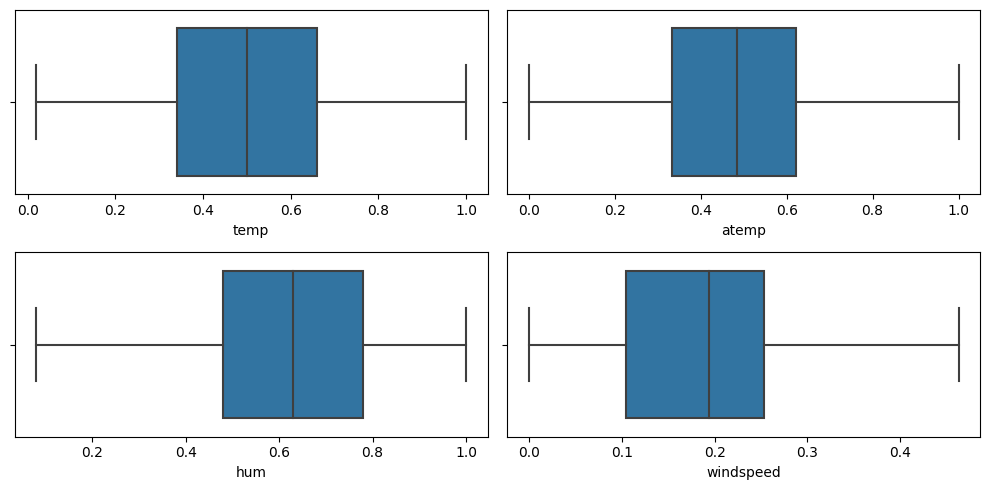

In [44]:
plt.figure(figsize=(10,5))
plotnumber=1
for i in num_col.drop(['cnt','yr','hr','holiday','workingday'],axis=1):
  if plotnumber<=4:
    ax=plt.subplot(2,2,plotnumber)
    sns.boxplot(data=data,x=data[i])
  plotnumber +=1
plt.tight_layout()

# 

**Converting Categorical into Numerical Column**

### **ONE HOT ENCODING**

In [45]:
months=pd.get_dummies(data.mnth,drop_first=True)
weekdays=pd.get_dummies(data.weekday,drop_first=True)
weather_sit=pd.get_dummies(data.weathersit,drop_first=True)
seasons=pd.get_dummies(data.season,drop_first=True)

#combining the new dummy vars to the new df
data=pd.concat([months,weekdays,weather_sit,seasons,data],axis=1)
data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
data.head()

,aug,dec,feb,jan,july,june,march,may,nov,oct,...,winter,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,False,False,False,True,False,False,False,False,False,False,...,True,0,0,0,0,0.24,0.2879,0.81,0.0,16
1,False,False,False,True,False,False,False,False,False,False,...,True,0,1,0,0,0.22,0.2727,0.80,0.0,40
2,False,False,False,True,False,False,False,False,False,False,...,True,0,2,0,0,0.22,0.2727,0.80,0.0,32
3,False,False,False,True,False,False,False,False,False,False,...,True,0,3,0,0,0.24,0.2879,0.75,0.0,13
4,False,False,False,True,False,False,False,False,False,False,...,True,0,4,0,0,0.24,0.2879,0.75,0.0,1


In [46]:
# final dataset
data.shape

(17379, 31)

In [47]:
data.columns

Index(['aug', 'dec', 'feb', 'jan', 'july', 'june', 'march', 'may', 'nov',
       'oct', 'sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter', 'yr', 'hr', 'holiday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# 

### **Scaling**

In [48]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['temp','atemp','hum','windspeed']]=scale.fit_transform(data[['temp','atemp','hum','windspeed']])

In [49]:
data.head()

,aug,dec,feb,jan,july,june,march,may,nov,oct,...,winter,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,False,False,False,True,False,False,False,False,False,False,...,True,0,0,0,0,0.224490,0.2879,0.793478,0.0,16
1,False,False,False,True,False,False,False,False,False,False,...,True,0,1,0,0,0.204082,0.2727,0.782609,0.0,40
2,False,False,False,True,False,False,False,False,False,False,...,True,0,2,0,0,0.204082,0.2727,0.782609,0.0,32
3,False,False,False,True,False,False,False,False,False,False,...,True,0,3,0,0,0.224490,0.2879,0.728261,0.0,13
4,False,False,False,True,False,False,False,False,False,False,...,True,0,4,0,0,0.224490,0.2879,0.728261,0.0,1




---



---



# **Feature Engineering**

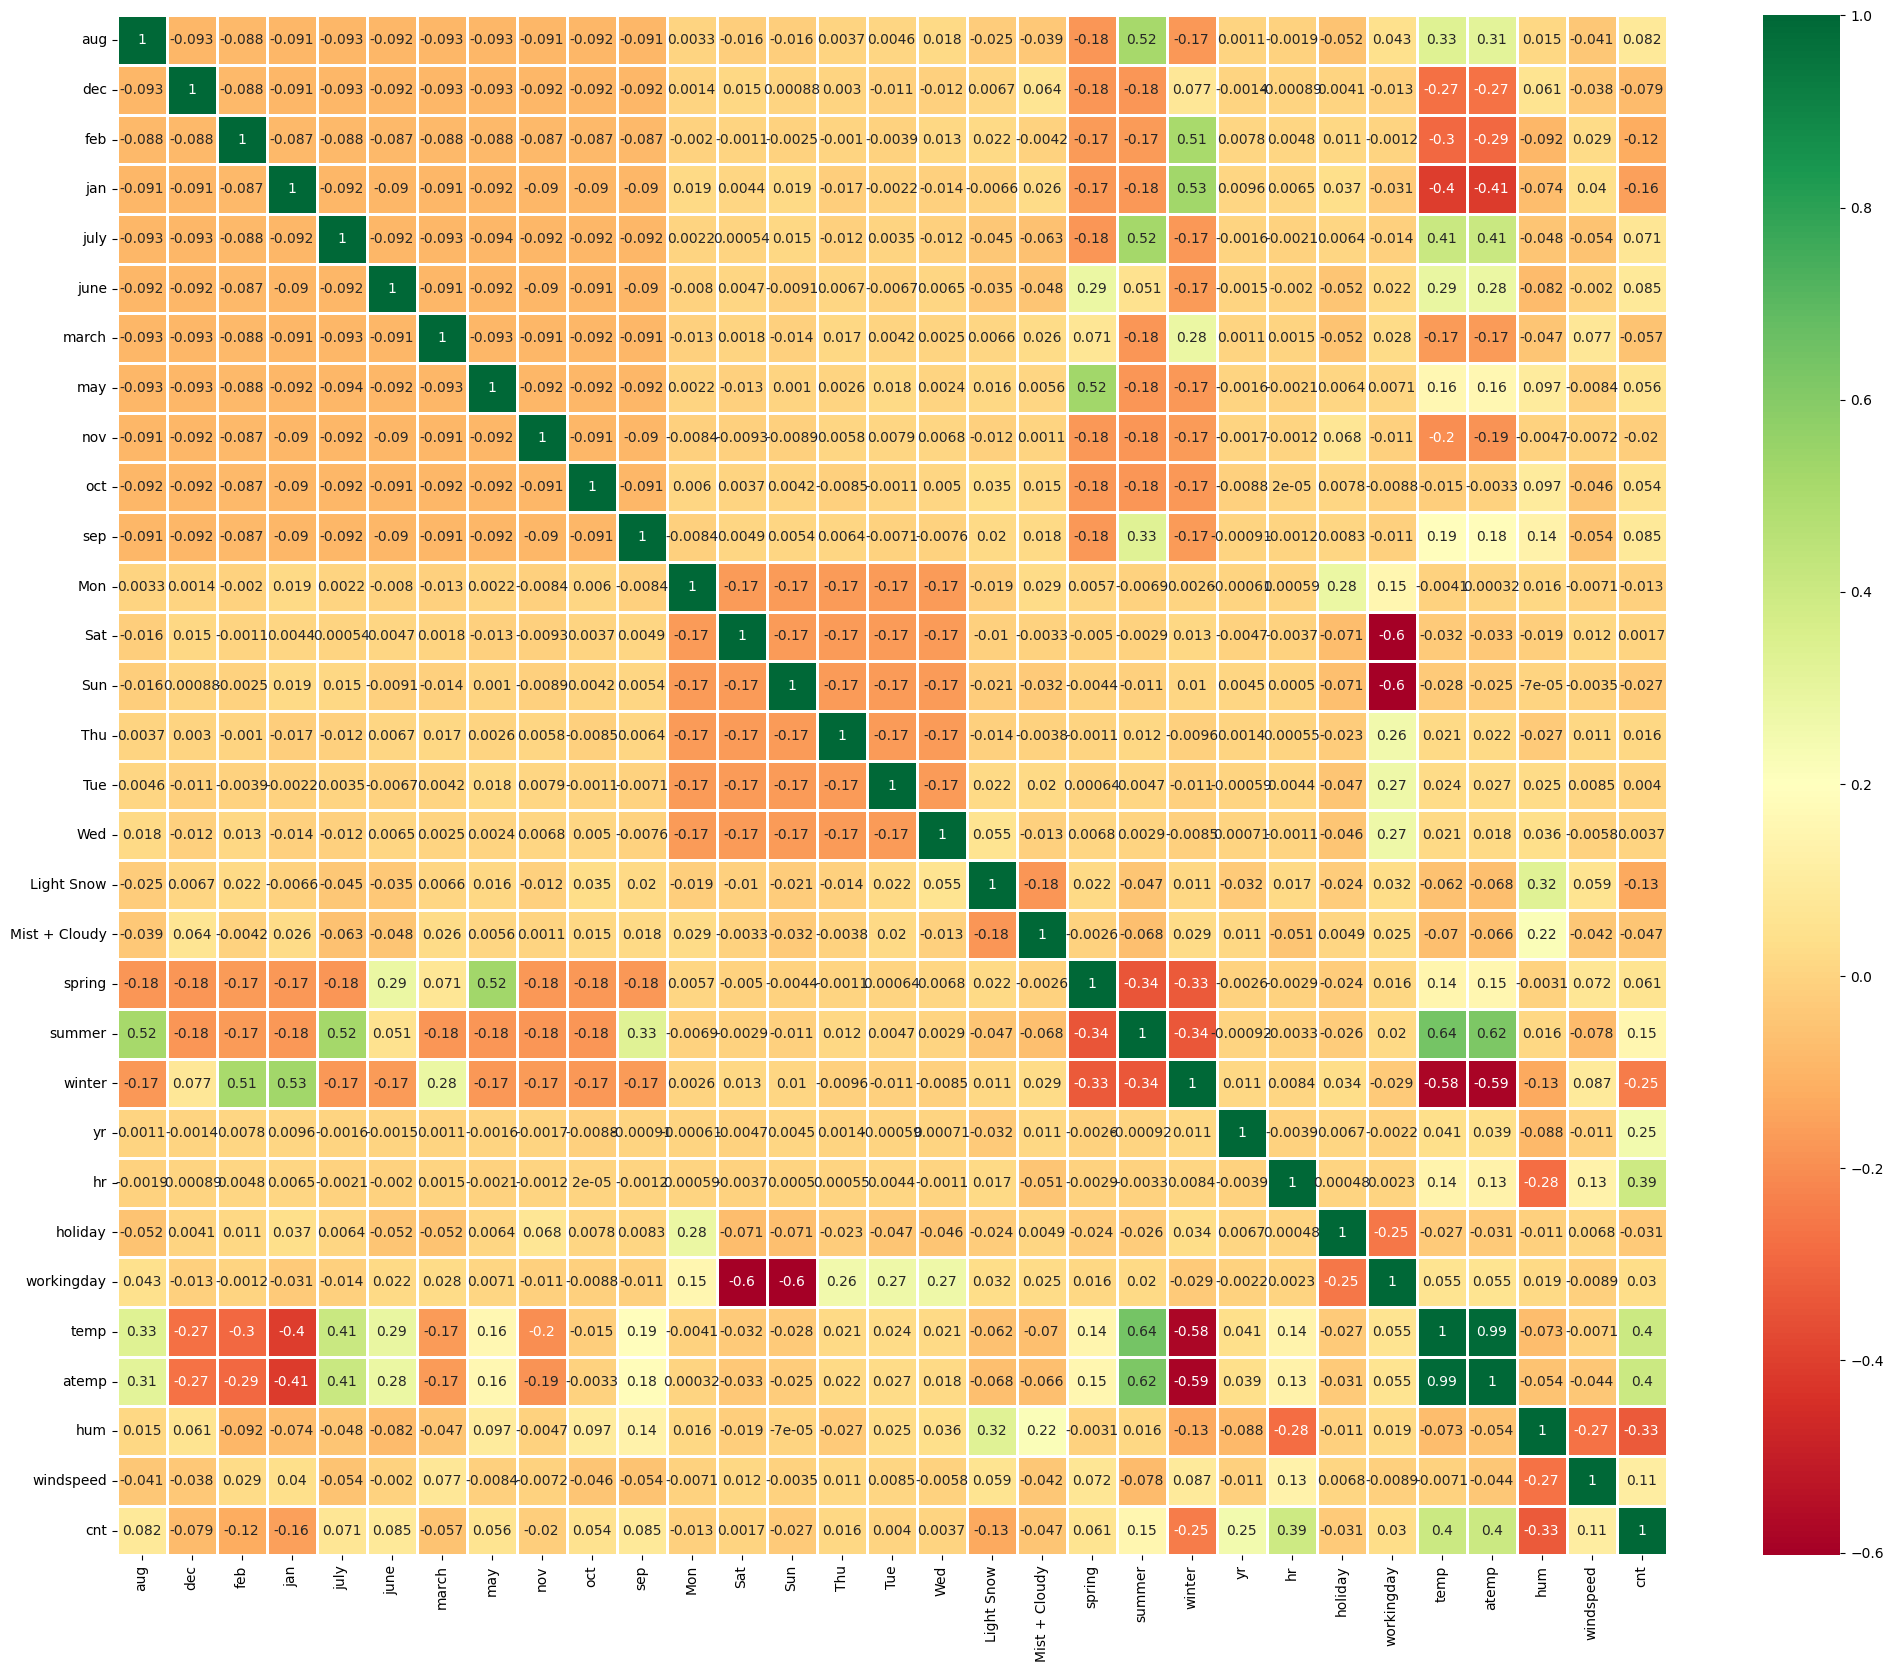

In [50]:
plt.figure(figsize = (25,20))
sns.heatmap(data.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

**Insight:** \
Since temp and atemp are highly correlated with each other, dropping atemp columns

In [51]:
data.drop('atemp',axis=1,inplace=True)

In [52]:
data.shape

(17379, 30)



---



---



# Train-Test Split:

**Splitting the Data**

In [53]:
x=data.drop('cnt',axis=1)
y=data['cnt']

**Splitting the data for training and testing**

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [55]:
y_test.shape

(5214,)



---



---



# 

# **Model Building**

We are Trying out the following Models for Training the data and Prediction:
- Linear Regresison
- Support Vector Regressor
- Decision Tree Regressor
- Random Forest Regressor
- XG-Boosting
- ANN Regressor

###### 

### 1. Linear Regression

In [56]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)

### 2. Support Vector Regressor

In [57]:
from sklearn.svm import SVR
svr_param_grid = {
    'C': [500, 600, 700, 800, 999],
    'gamma': [0.1, 0.01, 0.001]
}

svregressor = SVR()
grid_svr = RandomizedSearchCV(estimator=svregressor, param_distributions=svr_param_grid, verbose=2, scoring='r2', cv=3)
grid_svr.fit(x_train, y_train)
svregressor_best = grid_svr.best_estimator_
svregressor_best.fit(x_train, y_train)
y_pred_SVR = svregressor_best.predict(x_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .................................C=800, gamma=0.001; total time=   5.0s
[CV] END .................................C=800, gamma=0.001; total time=   5.1s
[CV] END .................................C=800, gamma=0.001; total time=   5.0s
[CV] END ..................................C=700, gamma=0.01; total time=   5.3s
[CV] END ..................................C=700, gamma=0.01; total time=   5.1s
[CV] END ..................................C=700, gamma=0.01; total time=   4.8s
[CV] END ..................................C=500, gamma=0.01; total time=   4.5s
[CV] END ..................................C=500, gamma=0.01; total time=   4.4s
[CV] END ..................................C=500, gamma=0.01; total time=   4.2s
[CV] END ...................................C=600, gamma=0.1; total time=  13.6s
[CV] END ...................................C=600, gamma=0.1; total time=  16.5s
[CV] END ...................................C=60

### 3. Decision Tree Regressor

In [58]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
y_pred_DTR = DTR.predict(x_test)

### 4. Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf_param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

RFR = RandomForestRegressor()
grid_rf = RandomizedSearchCV(estimator=RFR, param_distributions=rf_param_grid, verbose=2, scoring='r2', cv=3)
grid_rf.fit(x_train, y_train)
rf_best = grid_rf.best_estimator_
rf_best.fit(x_train, y_train)
y_pred_RFR = rf_best.predict(x_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   8.9s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   9.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   8.1s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimato

### 5. XGBoosting

In [60]:
from xgboost import XGBRegressor
xgb_param_grid = {
    'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6],
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'n_estimators': [50, 65, 80, 100, 115, 130, 150],
    'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6],
    'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6]
}

XGBR = XGBRegressor()
grid_xgb = RandomizedSearchCV(estimator=XGBR, param_distributions=xgb_param_grid, verbose=2, scoring='r2', cv=3)

grid_xgb.fit(x_train, y_train)
xgb_best = grid_xgb.best_estimator_

xgb_best.fit(x_train, y_train)
y_pred_XGBR = xgb_best.predict(x_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END gamma=0.2, learning_rate=0.15, max_depth=7, n_estimators=65, reg_alpha=0.2, reg_lambda=1.6; total time=   1.5s
[CV] END gamma=0.2, learning_rate=0.15, max_depth=7, n_estimators=65, reg_alpha=0.2, reg_lambda=1.6; total time=   0.1s
[CV] END gamma=0.2, learning_rate=0.15, max_depth=7, n_estimators=65, reg_alpha=0.2, reg_lambda=1.6; total time=   0.1s
[CV] END gamma=0, learning_rate=0.03, max_depth=5, n_estimators=80, reg_alpha=1.6, reg_lambda=1.6; total time=   0.0s
[CV] END gamma=0, learning_rate=0.03, max_depth=5, n_estimators=80, reg_alpha=1.6, reg_lambda=1.6; total time=   0.1s
[CV] END gamma=0, learning_rate=0.03, max_depth=5, n_estimators=80, reg_alpha=1.6, reg_lambda=1.6; total time=   0.1s
[CV] END gamma=0.2, learning_rate=0.5, max_depth=13, n_estimators=80, reg_alpha=0, reg_lambda=0.8; total time=   0.6s
[CV] END gamma=0.2, learning_rate=0.5, max_depth=13, n_estimators=80, reg_alpha=0, reg_lambda=0.8; total ti

### 6. ANN Regressor

In [61]:
from sklearn.neural_network import MLPRegressor
ANN_param_grid = {
    'hidden_layer_sizes': [(48, 10), (64, 16), (32, 8)],
    'learning_rate_init': [0.01, 0.001, 0.0001],
    'max_iter': [600, 800, 1000]
}

ANN = MLPRegressor(random_state=42)
grid_ann = RandomizedSearchCV(estimator=ANN, param_distributions=ANN_param_grid, verbose=2, scoring='r2', cv=3)
grid_ann.fit(x_train, y_train)
ann_best = grid_ann.best_estimator_
ann_best.fit(x_train, y_train)
y_pred_ANN = ann_best.predict(x_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END hidden_layer_sizes=(48, 10), learning_rate_init=0.01, max_iter=600; total time=   6.1s
[CV] END hidden_layer_sizes=(48, 10), learning_rate_init=0.01, max_iter=600; total time=  14.0s
[CV] END hidden_layer_sizes=(48, 10), learning_rate_init=0.01, max_iter=600; total time=  11.9s
[CV] END hidden_layer_sizes=(32, 8), learning_rate_init=0.01, max_iter=1000; total time=   2.5s
[CV] END hidden_layer_sizes=(32, 8), learning_rate_init=0.01, max_iter=1000; total time=   2.9s
[CV] END hidden_layer_sizes=(32, 8), learning_rate_init=0.01, max_iter=1000; total time=   4.6s
[CV] END hidden_layer_sizes=(64, 16), learning_rate_init=0.01, max_iter=800; total time=  11.5s
[CV] END hidden_layer_sizes=(64, 16), learning_rate_init=0.01, max_iter=800; total time=   7.8s
[CV] END hidden_layer_sizes=(64, 16), learning_rate_init=0.01, max_iter=800; total time=   9.6s
[CV] END hidden_layer_sizes=(48, 10), learning_rate_init=0.0001, max_iter=1

---



---

# Model Evaluation

In [62]:
models = [LR, svregressor_best, DTR, rf_best, xgb_best, ann_best]
model_names = ['Linear Regression', 'Support Vector Regressor', 'Decision Tree Regressor', 
               'Random Forest Regressor', 'XGBoosting', 'ANN Regressor']
mse_scores = []
r2_scores = []

for i, model in enumerate(models):
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2 = r2_score(y_test, model.predict(x_test))
    mse_scores.append(mse)
    r2_scores.append(r2)
    print(f"{model_names[i]}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    print("")

Linear Regression:
Mean Squared Error: 18766.439780144203
R-squared Score: 0.4059531394166528

Support Vector Regressor:
Mean Squared Error: 2003.0130727784453
R-squared Score: 0.9365951325061457

Decision Tree Regressor:
Mean Squared Error: 4172.15108362102
R-squared Score: 0.8679316225058948

Random Forest Regressor:
Mean Squared Error: 1885.8988532784595
R-squared Score: 0.9403023532277471

XGBoosting:
Mean Squared Error: 1610.01249567041
R-squared Score: 0.9490354654501432

ANN Regressor:
Mean Squared Error: 2264.627827726958
R-squared Score: 0.9283137842227127



#### Finding the Best model

In [63]:
# Find the best model based on R-squared score
best_model_idx = np.argmax(r2_scores)
best_model_name = model_names[best_model_idx]
best_mse = mse_scores[best_model_idx]
best_r2 = r2_scores[best_model_idx]

print(f"The best model is {best_model_name} with an R-squared score of {best_r2} and Mean Squared Error of {best_mse}.")

The best model is XGBoosting with an R-squared score of 0.9490354654501432 and Mean Squared Error of 1610.01249567041.


---



---

# Visualization

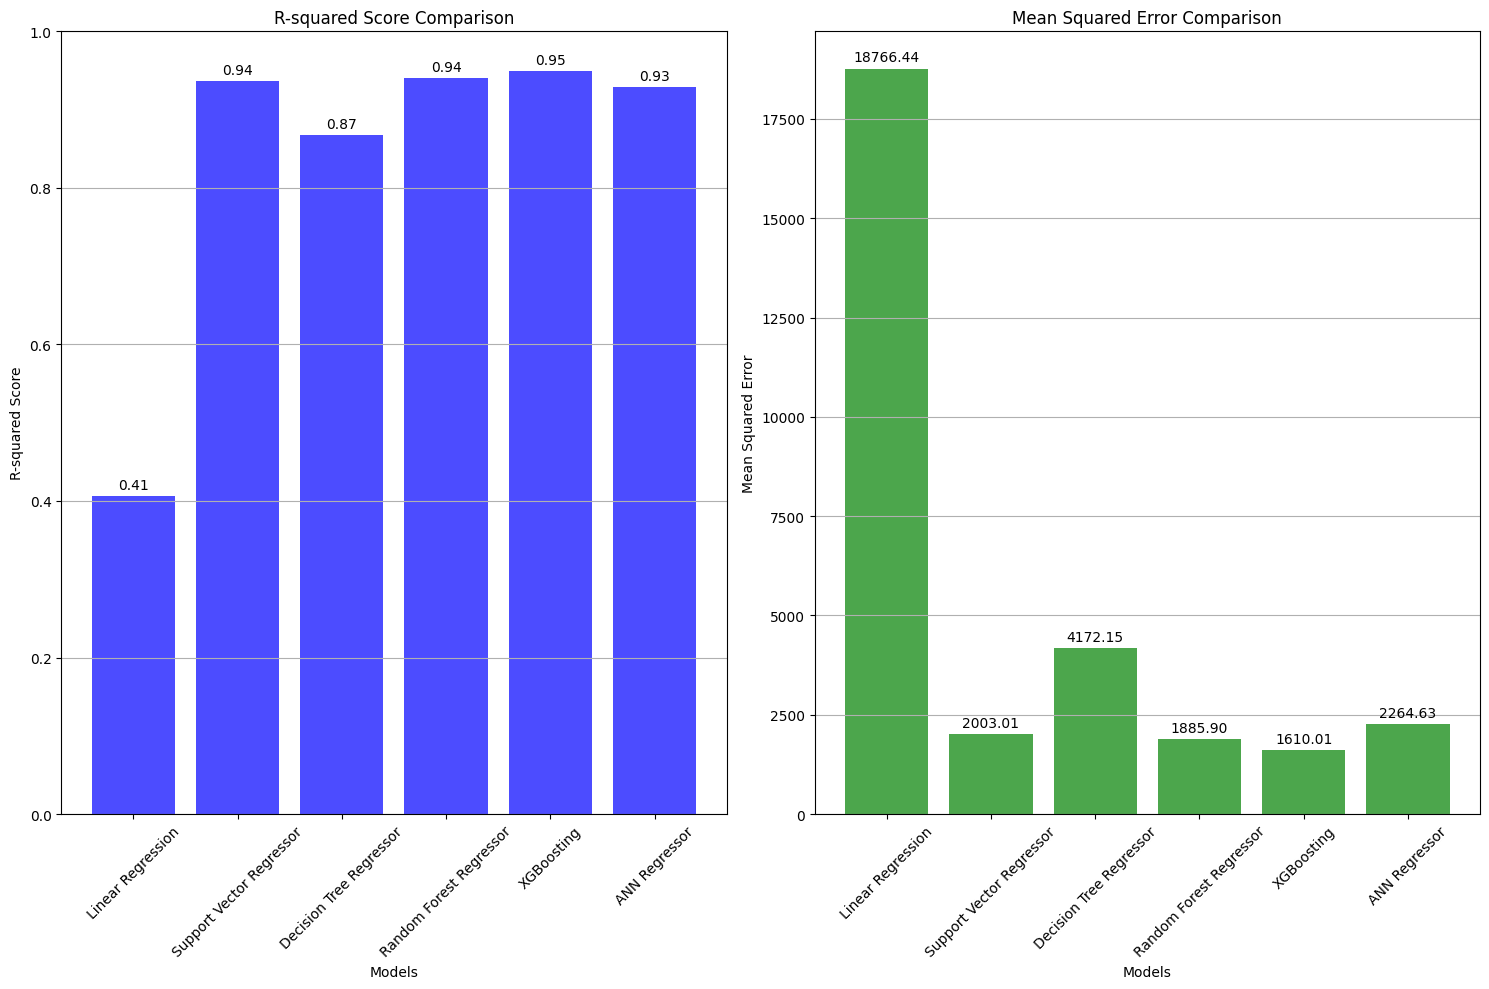

In [64]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Plot R-squared scores
bars1 = ax1.bar(model_names, r2_scores, color='b', alpha=0.7)
ax1.set_title('R-squared Score Comparison')
ax1.set_xlabel('Models')
ax1.set_ylabel('R-squared Score')
ax1.set_ylim(0, 1)  # Set the y-axis limits for R-squared scores (0 to 1)

# Plot Mean Squared Errors
bars2 = ax2.bar(model_names, mse_scores, color='g', alpha=0.7)
ax2.set_title('Mean Squared Error Comparison')
ax2.set_xlabel('Models')
ax2.set_ylabel('Mean Squared Error')

# Rotate x-axis labels for better visibility
for ax in (ax1, ax2):
    ax.tick_params(axis='x', rotation=45)

# Add horizontal grid lines
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

# Annotate the highest accuracy and lowest error bars
max_r2_idx = r2_scores.index(max(r2_scores))
min_mse_idx = mse_scores.index(min(mse_scores))

# Function to add annotations to bars
def add_annotations(ax, bars, labels):
    for bar, label in zip(bars, labels):
        height = bar.get_height()
        ax.annotate(f'{label}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

add_annotations(ax1, bars1, [f'{r:.2f}' for r in r2_scores])
add_annotations(ax2, bars2, [f'{mse:.2f}' for mse in mse_scores])

# Display the plots
plt.tight_layout()
plt.show()


**Conclusion**

In [70]:
import pandas as pd
from tabulate import tabulate

# Create a dictionary to hold the model evaluation results
results = {
    "Model": model_names,
    "Mean Squared Error": mse_scores,
    "R-squared Score": r2_scores
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Sort the DataFrame by R-squared score in descending order
results_df = results_df.sort_values(by="R-squared Score", ascending=False)

# Reset the index for the DataFrame
results_df = results_df.reset_index(drop=True)

# Print the table using tabulate
table = tabulate(results_df, headers="keys", tablefmt="pretty", showindex=False)

# Print the table
print(table)


+--------------------------+--------------------+--------------------+
|          Model           | Mean Squared Error |  R-squared Score   |
+--------------------------+--------------------+--------------------+
|        XGBoosting        |  1610.01249567041  | 0.9490354654501432 |
| Random Forest Regressor  | 1885.8988532784595 | 0.9403023532277471 |
| Support Vector Regressor | 2003.0130727784453 | 0.9365951325061457 |
|      ANN Regressor       | 2264.627827726958  | 0.9283137842227127 |
| Decision Tree Regressor  |  4172.15108362102  | 0.8679316225058948 |
|    Linear Regression     | 18766.439780144203 | 0.4059531394166528 |
+--------------------------+--------------------+--------------------+


In [71]:
print(f"It is clear from the above table that -\n\nThe best model is \"{best_model_name}\" with \nR-squared score    : {best_r2} \nMean Squared Error : {best_mse}.")

It is clear from the above table that -

The best model is "XGBoosting" with 
R-squared score    : 0.9490354654501432 
Mean Squared Error : 1610.01249567041.


**By comparing above models XGBoosting has given highest R2_score, Suggesting XG_Boost_Regressor for Production**.

## **Report on Challenges Faced**
* Converting most of the features from directly given discrete columns into categorical and then into numerical requires multiple steps.
* Due to the large dataset, we have chosen a limited number of iterations for hyperparameter tuning.
* On applying multiple models, we achieved a maximum R2 score of about 95% (subject to change) using XG Boosting. However, despite making further adjustments to the model's parameters such as estimators, learning rate, random_state, etc., the R2 score did not increase beyond 95%.

---



---

<h1 align='center'><b>End of Project. Thank You!</b></font></h1>

# 